In [1]:
import imports
imports.update_path()

from helpers import nx, sp, ic
from helpers_classes import get_emedding_coords_as_point
from simple_st_graph import create_graph

from shapely_helpers import get_centroid

from embedding import Embedding
from faces3 import Faces

from edge_face_match import EdgeFaceMatch
from vertex_face_match import VertexFaceMatch


from face_data import FaceData
from list_and_dict_utils import get_key_by_value
from dual_creation import Dual

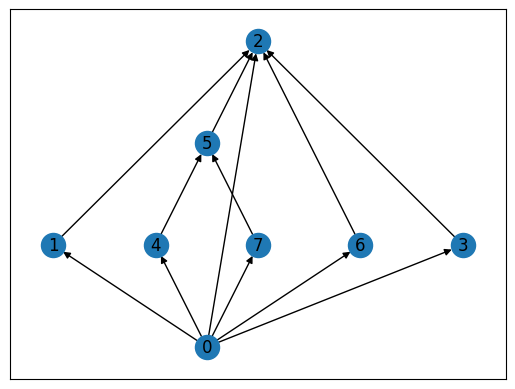

In [2]:
dir_data = create_graph(DIRECTED=True)
nx.draw_networkx(dir_data.G, pos=dir_data.embed)

undir_data = create_graph()

In [3]:
du = Dual(DiGraphData=dir_data, GraphData=undir_data)
du.create_dual()


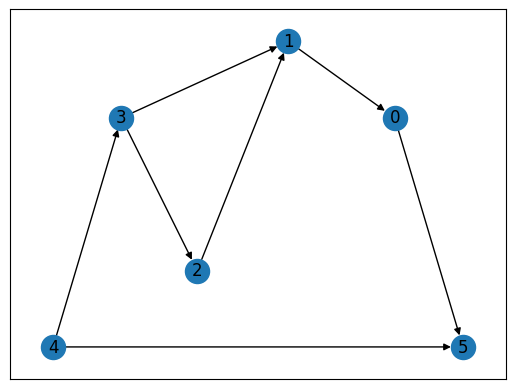

In [5]:
nx.draw_networkx(du.DualGraphData.G, pos=du.DualGraphData.embed)

In [4]:
em = Embedding(undir_data)
em.get_graph_embedding()

fa = Faces(undir_data, em.half_edges)
fa.find_faces()
vf = VertexFaceMatch(dir_data, fa.faces)
vf.run()
ef = EdgeFaceMatch(dir_data, fa.faces)
ef.run()

#vf.vertex_faces, ef.edge_faces

In [4]:
def create_shape(face):
    nodes = [e[1] for e in face]
    face_coords = get_emedding_coords_as_point(dir_data.embed, nodes)
    shape = sp.Polygon(sp.LinearRing(face_coords))

    return shape

In [5]:
def get_center(face):
    shape = create_shape(face)
    xy = get_centroid(shape)
    return xy

In [31]:
face_locs = {ix:get_center(f) for ix, f in enumerate(fa.faces)}
unit = 0.5
face_locs[4] = (face_locs[3][0] - unit, face_locs[4][1]-unit)
face_locs[5] = (face_locs[0][0] + unit,face_locs[0][1]-unit )
face_locs

{0: (2.9444444444444446, 1.3333333333333333),
 1: (2.1666666666666665, 1.5),
 2: (1.5, 1.0),
 3: (0.9444444444444445, 1.3333333333333333),
 4: (0.44444444444444453, 0.8333333333333335),
 5: (3.4444444444444446, 0.8333333333333333)}

In [7]:
vf.new_faces

[[(0, 3), (3, 2), (6, 2), (0, 6)],
 [(0, 6), (6, 2), (5, 2), (7, 5), (0, 7)],
 [(0, 7), (7, 5), (4, 5), (0, 4)],
 [(0, 4), (4, 5), (5, 2), (1, 2), (0, 1)],
 [(0, 1), (1, 2), (0, 2)],
 [(0, 2), (3, 2), (0, 3)]]

In [8]:
edges = list(dir_data.G.edges)
edge_map = {}
for e in edges:
    edge_map[e] = []
    for ix, face in enumerate(vf.new_faces):
        if ix != 5:
            if e in face:
                edge_map[e].append(ix)

In [9]:
edge_map

{(0, 3): [0],
 (0, 6): [0, 1],
 (0, 7): [1, 2],
 (0, 2): [4],
 (0, 4): [2, 3],
 (0, 1): [3, 4],
 (3, 2): [0],
 (6, 2): [0, 1],
 (7, 5): [1, 2],
 (4, 5): [2, 3],
 (1, 2): [3, 4],
 (5, 2): [1, 3]}

In [21]:
len(edge_map.keys())

12

In [10]:
face_dict = {k:v for k,v in enumerate(fa.faces)}
face_dict

{0: [(0, 3), (3, 2), (2, 6), (6, 0)],
 1: [(0, 6), (6, 2), (2, 5), (5, 7), (7, 0)],
 2: [(0, 7), (7, 5), (5, 4), (4, 0)],
 3: [(0, 4), (4, 5), (5, 2), (2, 1), (1, 0)],
 4: [(0, 1), (1, 2), (2, 0)],
 5: [(0, 2), (2, 3), (3, 0)]}

In [11]:
get_key_by_value(face_dict, fa.faces[0])

0

In [16]:
face_dict = {k:v for k,v in enumerate(fa.faces)}

def get_face_ix(face):
    return get_key_by_value(face_dict, face)

In [24]:
# update edge faces 
edge_faces = {}
edge_faces_dir = {}
for k,v in ef.edge_faces.items():
    l = get_face_ix(v.left_face)
    r = get_face_ix(v.right_face)
    edge_faces[k] = FaceData(l, r)
    edge_faces_dir[k] = (l,r)

In [19]:
edge_faces

{(0, 3): FaceData({'left_face': 0, 'right_face': 5}),
 (0, 6): FaceData({'left_face': 1, 'right_face': 0}),
 (0, 7): FaceData({'left_face': 2, 'right_face': 1}),
 (0, 2): FaceData({'left_face': 5, 'right_face': 4}),
 (0, 4): FaceData({'left_face': 3, 'right_face': 2}),
 (0, 1): FaceData({'left_face': 4, 'right_face': 3}),
 (3, 2): FaceData({'left_face': 0, 'right_face': 5}),
 (6, 2): FaceData({'left_face': 1, 'right_face': 0}),
 (7, 5): FaceData({'left_face': 2, 'right_face': 1}),
 (4, 5): FaceData({'left_face': 3, 'right_face': 2}),
 (1, 2): FaceData({'left_face': 4, 'right_face': 3}),
 (5, 2): FaceData({'left_face': 3, 'right_face': 1})}

In [37]:
edges = list(edge_faces_dir.values())
for ix, e in enumerate(edges):
    if e == (5,4):
        edges[ix] = (4,5)
edges

[(0, 5),
 (1, 0),
 (2, 1),
 (4, 5),
 (3, 2),
 (4, 3),
 (0, 5),
 (1, 0),
 (2, 1),
 (3, 2),
 (4, 3),
 (3, 1)]

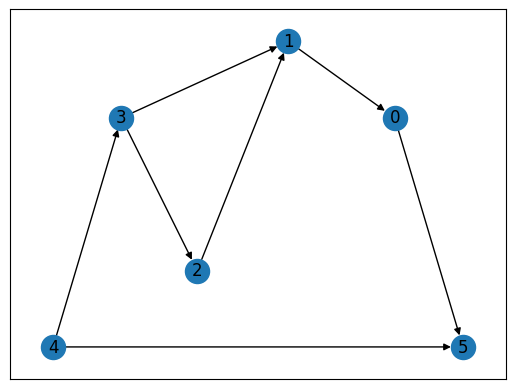

In [38]:
G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw_networkx(G, pos=face_locs)

In [22]:
len(edge_faces.keys())

12

In [14]:
dual_edges = [tuple(v) for v in edge_map.values() if len(v) == 2]
dual_edges

[(0, 1), (1, 2), (2, 3), (3, 4), (0, 1), (1, 2), (2, 3), (3, 4), (1, 3)]

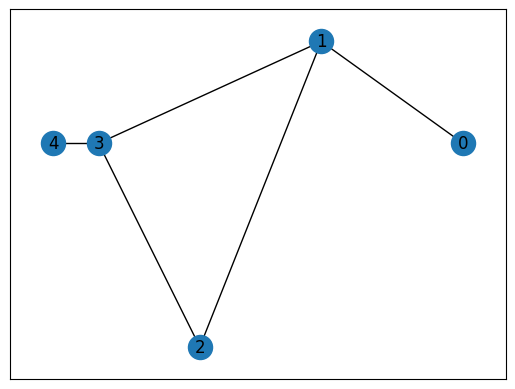

In [15]:
G = nx.Graph()
G.add_edges_from(dual_edges)
nx.draw_networkx(G, pos=face_locs)